## 라이브러리 불러오기

In [1]:
!pip install geopandas

In [3]:
import geopandas as gpd

world_gdf = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_gdf.head()

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_10940\440028329.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_gdf = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## 데이터 불러오기

In [5]:
DATA_PATH = 'map/'
states = gpd.read_file(DATA_PATH + 'ne_110m_admin_1_states_provinces.shp')
states.head(1)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."


In [9]:
print(states['geometry'][0])

POLYGON ((-89.95765601272012 47.286907253603175, -90.13175391311144 47.29274669045216, -90.30585181350276 47.29801768654593, -90.47994971389409 47.30385712339489, -90.6540476142854 47.309128119488676, -90.85778194859611 47.21282908791278, -91.06097368036777 47.117046820659795, -91.26470801467849 47.02126455340681, -91.46844234898919 46.9249655218309, -91.59225908076053 46.876260484395914, -91.71661841507091 46.82760712339301, -91.8409777493813 46.778385321635, -91.96479448115262 46.72970612241605, -92.01189754918667 46.71172272397848, -92.27487891312 46.65614472104858, -92.26482784703924 46.09522288673644, -92.2965830146826 46.09628225359842, -92.54369971390233 45.98569468849381, -92.75696834997089 45.88991242124082, -92.89982784704182 45.705763454768714, -92.68922054723626 45.51843638771068, -92.76541744665064 45.26708222104298, -92.76647681351261 44.9961426865367, -92.79665584997105 44.77602692318949, -92.50507158076417 44.58391978614445, -92.38549231644078 44.57492808692567, -92.062

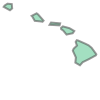

In [16]:
states['geometry'][3]

In [12]:
print(type(states))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [18]:
# MultiPolygon : polygon 들의 집합
states.geom_type.head(4)

0         Polygon
1         Polygon
2         Polygon
3    MultiPolygon
dtype: object

In [19]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

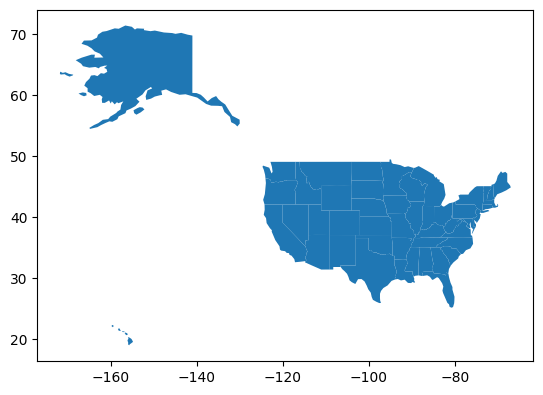

In [20]:
import matplotlib.pyplot as plt
ax = states.plot()
plt.show()

### GeoJSON 파일로 내보내기
- map 디렉토리의 6개 파일이 .json 파일 하나로 압축되는 과정
- [기타 참고] https://www.naturalearthdata.com/

In [22]:
states.to_file('my_file.json', driver="GeoJSON")

### GeoJSON 파일로 불러오기

In [26]:
DATA_PATH = 'map/'
new_df = gpd.read_file(DATA_PATH + 'my_file.json')
new_df[['adm1_code', 'name']].head(5)

,adm1_code,name
0,USA-3514,Minnesota
1,USA-3515,Montana
2,USA-3516,North Dakota
3,USA-3517,Hawaii
4,USA-3518,Idaho


In [27]:
type(new_df[['adm1_code', 'name']])

pandas.core.frame.DataFrame

In [28]:
new_df[['adm1_code', 'name', 'geometry']].head(5)

,adm1_code,name,geometry
0,USA-3514,Minnesota,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,USA-3515,Montana,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,USA-3516,North Dakota,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,USA-3517,Hawaii,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,USA-3518,Idaho,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."


In [29]:
type(new_df[['adm1_code', 'name', 'geometry']])

geopandas.geodataframe.GeoDataFrame

## 데이터 매핑

In [30]:
import geopandas as gpd
import pandas as pd
import numpy as np
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_10940\1454031664.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [31]:
import pandas as pd
import numpy as np

# 가상의 데이터 생성
data = pd.DataFrame({
    'name': world['name'],
    'data': np.random.randint(100, 1000, len(world))
})

data.head()

,name,data
0,Fiji,797
1,Tanzania,139
2,W. Sahara,955
3,Canada,702
4,United States of America,735


In [32]:
world_df = world.merge(data, on='name')
world_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,data
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",797
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",139
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",955
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",702
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",735
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",842
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",203
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",988
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",237


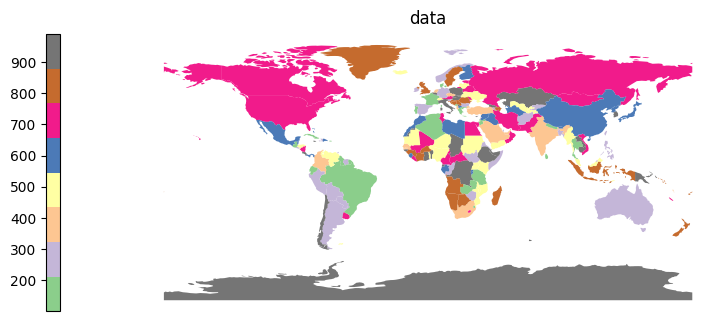

In [35]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(10, 6))
world_df.plot(ax=ax, column="data", cmap="Accent", legend=False, alpha=0.9)
ax.set_title('data')
ax.set_axis_off()

cb = fig.colorbar(ax.collections[0], ax=ax, location = 'left', shrink = 0.6)
plt.savefig(DATA_PATH + 'map02.png', dpi=200)
plt.show()

### http://www.gisdeveloper.co.kr/

- 산불의 경우 : '리' 단위로 봐야 함 (어렵다면 '읍면동' 까지)
- 우리나라의 모든 산지를 전부 볼 수는 없음 --> target을 설정 (산불이 잘나는 지역으로)
- QGIS 이용하여 뽑아내기
- 강사님 블로그의 서울시 지도데이터 실습 참고하기